In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier


%matplotlib inline
%config InlineBackend.figure_format='retina'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
yelp_df = pd.read_csv('https://raw.githubusercontent.com/rabin1323/Data_Set/main/yelp_review_csv1.csv')
yelp_df

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0
...,...,...,...,...,...,...,...,...,...
9995,BFp9V3jzANiEdP5NmIVDRg,OUfAxCaWfFs5Hp_MPstxfA,4HVGgGI5rKvUJcaIV7ub7Q,2,2013-11-17,I've had this place two times now... Just does...,0,0,0
9996,LqxEIponInZxdtwTISZTpg,OUfAxCaWfFs5Hp_MPstxfA,9LAXz_VfATZ0kLdaavkN4g,4,2017-06-18,Cool place. A bit expensive when compared to t...,0,0,0
9997,tRQTBlFcKB65G9Ow3PI1nQ,OUfAxCaWfFs5Hp_MPstxfA,_6hReDyVSr94W2WMO1LJLw,3,2013-09-15,The best vanilla latte I have ever had! The co...,0,0,0
9998,rUFCKDGpuP03miyaPlv99A,OUfAxCaWfFs5Hp_MPstxfA,AghcEVxuULED2z8ibLKTww,3,2013-11-17,I've only had their Moca and it was gross! I'm...,1,0,0


**EXPLORING DATASET**



In [ ]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    10000 non-null  object
 1   user_id      10000 non-null  object
 2   business_id  10000 non-null  object
 3   stars        10000 non-null  int64 
 4   date         10000 non-null  object
 5   text         10000 non-null  object
 6   useful       10000 non-null  int64 
 7   funny        10000 non-null  int64 
 8   cool         10000 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 703.2+ KB


In [ ]:
yelp_df.describe()

,stars,useful,funny,cool
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.743700,1.669500,0.649800,0.777800
std,1.266322,3.059511,1.840679,1.958625
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,1.000000,0.000000,0.000000
75%,5.000000,2.000000,1.000000,1.000000
max,5.000000,95.000000,46.000000,43.000000


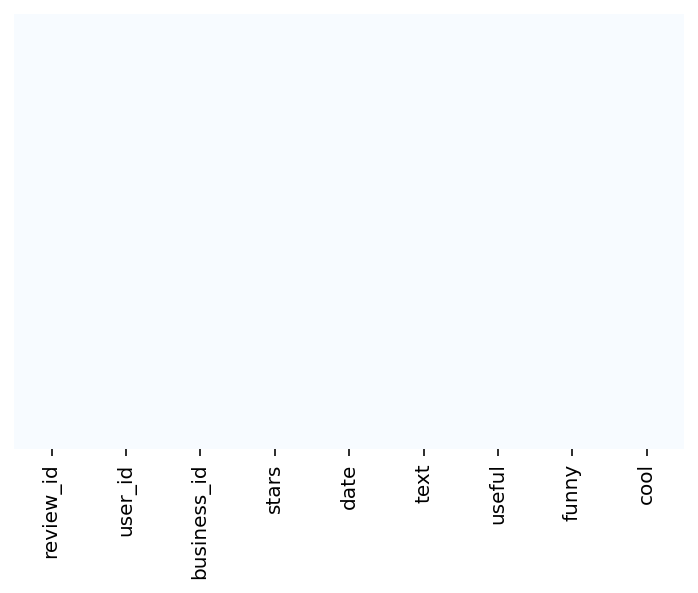

In [ ]:
#to check if we have any null values
sns.heatmap(yelp_df.isnull(), yticklabels=False, cbar= False, cmap="Blues")
#if there is any dot on the plot that means we have null values

In [ ]:
yelp_df=yelp_df.drop(['useful','funny','cool','review_id','user_id','business_id','date'], axis=1)
yelp_df

,stars,text
0,5,Super simple place but amazing nonetheless. It...
1,5,Small unassuming place that changes their menu...
2,5,Lester's is located in a beautiful neighborhoo...
3,4,Love coming here. Yes the place always needs t...
4,4,Had their chocolate almond croissant and it wa...
...,...,...
9995,2,I've had this place two times now... Just does...
9996,4,Cool place. A bit expensive when compared to t...
9997,3,The best vanilla latte I have ever had! The co...
9998,3,I've only had their Moca and it was gross! I'm...


In [ ]:
#data cleaning
def preprocess(review_text):
  remove_pctn=[char for char in review_text if char not in string.punctuation]
  remove_pctn= ''.join(remove_pctn)
  lwr = [word.lower() for word in remove_pctn.split()]
  final_word = [word for word in lwr if word not in stopwords.words('english')]
  return final_word

For the sentiment analsysis we want to consider only two types of stars here i.e, one star for negative reviews and fives stars for positive reviews.

We will also use count vectorizer to make a model which will be used to understand the review text. After that we will transform the vectorized text and assign to variable x. Lastly, we will split the entire data to train and test model using train_test_split()

In [ ]:
#Filtering Data
filtered_data = yelp_df[(yelp_df['stars']==1) | (yelp_df['stars']==5)]
x = filtered_data['text'] #assigning review text to variable x
y=filtered_data['stars'] #assigning stars to variable y
vectorizer=CountVectorizer(analyzer=preprocess).fit(x)
x=vectorizer.transform(x) #transforming the vectorized text 
X_train, X_test, y_train, y_test= train_test_split(x, y, random_state=42)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


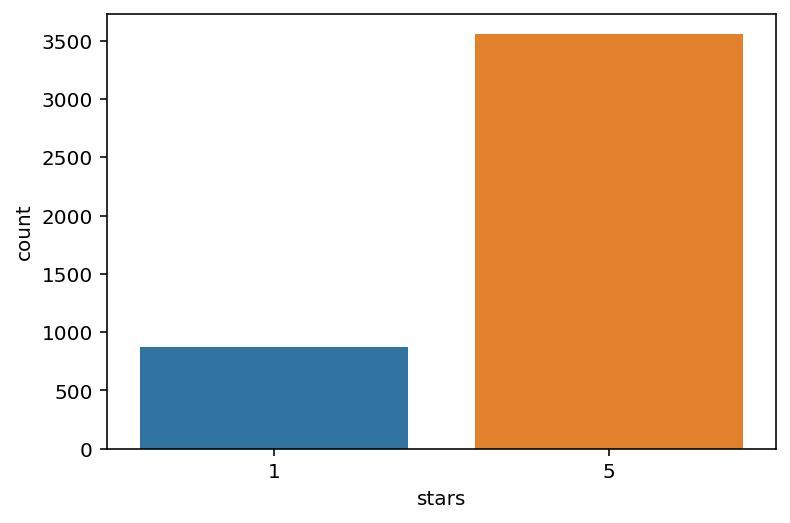

In [ ]:
sns.countplot(filtered_data['stars'])

In [ ]:
model= MLPClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [ ]:
#plotting the reviews using confusion matrix
def conf_matrix(y, y_predict, reviews, title= 'Confusion_Matrix'):
  c_matrix = confusion_matrix(y, y_predict)
  clsfn_report = classification_report(y, y_predict)
  ticks = np.arange(len(reviews))
  score = accuracy_score(y, y_predict)
  score=round(score*100,2)
  print("Accuracy_score:", score)
  print('classification_report', clsfn_report)
  sns.heatmap(c_matrix, cmap= 'PuBu', annot= True, fmt='g', annot_kws={'size':20})
  plt.xticks(ticks, reviews)
  plt.yticks(ticks, reviews)
  plt.xlabel('predicted', fontsize=20)
  plt.ylabel('actual', fontsize=20)
  plt.title(title, fontsize=20)
  plt.show

Accuracy_score: 93.86
classification_report               precision    recall  f1-score   support

           1       0.94      0.76      0.84       234
           5       0.94      0.99      0.96       873

    accuracy                           0.94      1107
   macro avg       0.94      0.87      0.90      1107
weighted avg       0.94      0.94      0.94      1107



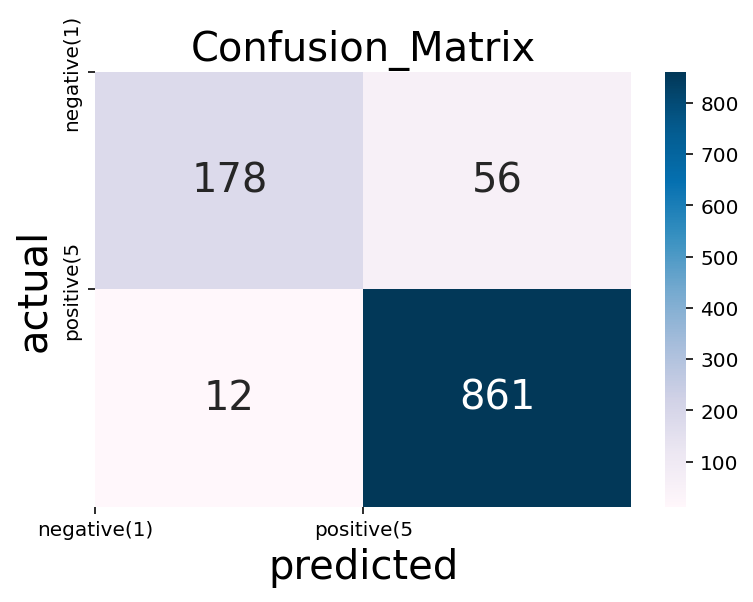

In [ ]:
conf_matrix(y_test, y_predict, reviews=['negative(1)', 'positive(5'])

The Accuracy is 93.86 % which is a good sign. 